# Introducción a la sintaxis de Python IV: bucles y condicionales

_En esta clase continuaremos con nuestra introducción a Python. En concreto, abordaremos las estructuras de control típicas: los bucles y los condicionales_.

**Objetivos**:

* Sintaxis de los condicionales: `if`, `elif`, `else`.
* Sintaxis de los bucles `for`.
* Sintaxis de los bucles `while`.

###### El contenido de esta clase usa material de [swcarpentry Python](http://swcarpentry.github.io/python-novice-inflammation/)

## Estructuras de control (I): Condicionales

    if <condition>:
        <do something>
    elif <condition>:
        <do other thing>
    else:
        <do other thing>

<div class="alert alert-error"><strong>Importante:</strong> En Python los bloques se delimitan por sangrado, utilizando siempre cuatro espacios. Cuando ponemos los dos puntos al final de la primera línea del condicional, todo lo que vaya a continuación con <i>un</i> nivel de sangrado superior se considera dentro del condicional. En cuanto escribimos la primera línea con un nivel de sangrado inferior, hemos cerrado el condicional. Si no seguimos esto <b>al pie de la letra</b> Python nos dará errores; es una forma de forzar a que el código sea legible.</div>

In [2]:
# Definimos dos variables:
x = 3
y = 1

In [3]:
# Si x > y
print(x,y)
if x > y:
    print("x es mayor que y")
    print("x sigue siendo mayor que y")

3 1
x es mayor que y
x sigue siendo mayor que y


In [6]:
# indentation
if 1 < 0:
    print("1 es menor que 0")
print("1 sigue siendo menor que 0")  # <-- ¡Mal!

1 sigue siendo menor que 0


In [7]:
# indentation 
if 1 < 0:
    print("1 es menor que 0")
     print("1 sigue siendo menor que 0")

IndentationError: unexpected indent (<ipython-input-7-b64aa300331e>, line 4)

Si queremos añadir ramas adicionales al condicional, podemos emplear la sentencia `elif` (abreviatura de *else if*). Para la parte final, que debe ejecutarse si ninguna de las condiciones anteriores se ha cumplido, usamos la sentencia `else`:

In [8]:
# Asignamos un nuevo valor a x
x = 0

In [9]:
# else
print(x,y)
if x > y:
    print("x es mayor que y")
else:
    print("x es menor que y")

0 1
x es menor que y


In [10]:
# Asignamos un nuevo valor a y
y = 0

In [11]:
# elif
print(x, y)
if x < y:
    print("x es menor que y")
elif x == y:
    print("x es igual a y")
else:
    print("x no es ni menor ni igual que y")

0 0
x es igual a y


## Estructuras de control (II): Bucles

En Python existen dos tipos de estructuras de control típicas:

1. Bucles `while`
2. Bucles `for`

### `while` 

Los bucles `while` repetiran las sentencias anidadas en él mientras se cumpla una condición:

    while <condition>:
        <things to do>
        
Como en el caso de los condicionales, los bloques se separan por indentación sin necesidad de sentencias del tipo `end`:

In [12]:
ii = -2
while ii < 5:
    print(ii)
    ii += 1

-2
-1
0
1
2
3
4


<div class="alert alert-info"><strong>Tip</strong>:
    
`ii += 1` equivale a `ii = ii + 1`. La segunda sentencia, realiza la operación ii + 1 creando un nuevo objeto con ese valor y luego lo asigna a la variable ii; es decir, existe una reasignación. En la primer sentencia, sin embargo, el incremento se produce sobre la propia variable. Esto puede conducirnos a mejoras en velocidad.

Otros operadores 'in-place' son: `-=`, `*=`, `/=` 
</div>

Se puede interrumpir el bucle a la mitad con la sentencia `break`:

In [13]:
ii = 0
while ii < 5:
    print(ii)
    ii += 1
    if ii == 3:
        break

0
1
2


Un bloque `else` justo después del bucle se ejecuta si este no ha sido interrumpido por nosotros:

In [14]:
ii = 0
while ii < 5:
    print(ii)
    ii += 1
    if ii == 3:
        break
else:
    print("El bucle ha terminado")

0
1
2


In [15]:
ii = 0
while ii < 5:
    print(ii)
    ii += 1
    #if ii == 3:
        #break
else:
    print("El bucle ha terminado")

0
1
2
3
4
El bucle ha terminado


### `for`

El otro bucle en Python es el bucle `for`. La idea es recorrer un conjunto de elementos:

    for <element> in <iterable_object>:
        <do whatever...>

In [16]:
for ii in (1,2,3,4,5):
    print(ii)

1
2
3
4
5


In [17]:
for nombre in "Juan", "Luis", "Carlos":
    print(nombre)

Juan
Luis
Carlos


In [18]:
for ii in range(3):
    print(ii)

0
1
2


In [19]:
for jj in range(2, 5):
    print(jj)

2
3
4


## Procesando muchos archivos

Con todo lo que sabemos, ahora podemos procesar de una vez, en bucle, un montón de archivos, con un esfuerzo similar al que necesitábamos para uno solo.

Sólo nos falta una librería:

In [20]:
import glob

La librería `glob` contiene una función que se llama `glob`  la cual sirve para encontrar todos los nombres que cumplen un patrón mediante una expresión regular.

In [21]:
# ipynb
glob.glob('*.ipynb')

['005-Sintaxis_basica_iv_estructuras_control.ipynb',
 '002-Sintaxis_basica_i_tipos_datos.ipynb',
 '001-PythonBasico-JupyterNotebook.ipynb',
 '004-Sintaxis_basica_iii_funciones.ipynb',
 '003-Sintaxis_basica_ii_utilizando_librerias.ipynb',
 '000-Bienvenido.ipynb']

In [23]:
# csv
glob.glob('../data/swc/*.csv')

['../data/swc/inflammation-11.csv',
 '../data/swc/inflammation-08.csv',
 '../data/swc/inflammation-02.csv',
 '../data/swc/inflammation-01.csv',
 '../data/swc/inflammation-04.csv',
 '../data/swc/inflammation-07.csv',
 '../data/swc/inflammation-09.csv',
 '../data/swc/inflammation-03.csv',
 '../data/swc/inflammation-06.csv',
 '../data/swc/inflammation-12.csv',
 '../data/swc/inflammation-05.csv',
 '../data/swc/inflammation-10.csv']

El resultado es una lista de strings y, por lo tanto, se pude iterar a lo largo de ella y aplicar a cada archivo una función para analizarlo:

Creemos una función `analyze` para explorar cada archivo:

In [24]:
%matplotlib inline

In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
def analyze(filename):
    data = np.loadtxt(fname=filename, delimiter=',')
    plt.plot(data.mean(axis=0))   
    plt.show()

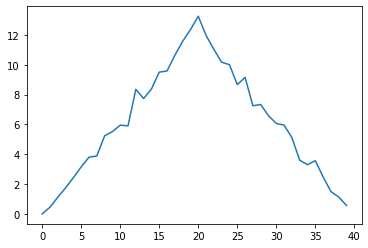

In [27]:
analyze('../data/swc/inflammation-01.csv')

Podemos usarla *dataset* a *dataset*:

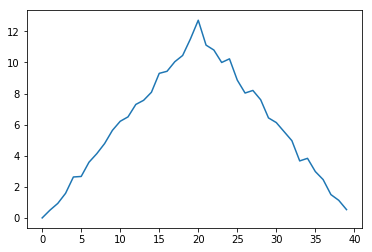

In [29]:
analyze('../data/swc/inflammation-02.csv')

o bien invocarla dentro de un bucle:

../data/swc/inflammation-11.csv


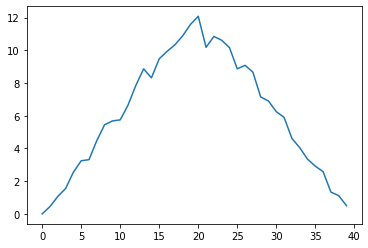

../data/swc/inflammation-08.csv


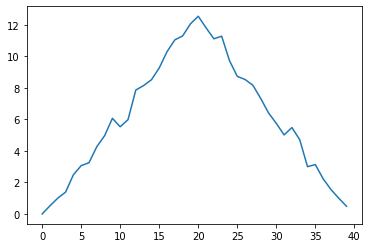

../data/swc/inflammation-02.csv


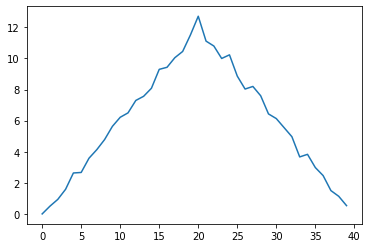

In [28]:
filenames = glob.glob('../data/swc/*.csv')
filenames = filenames[0:3]
for f in filenames:
    print(f)
    analyze(f)

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())